### Prerequisites

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

#### Helper Functions

In [51]:
def plot_top_counts(values_series, ax, title, palette='viridis', xlabel='Count', ylabel='', top_n=10):
    # Calculate top counts
    top_counts = values_series.value_counts().head(top_n)
    
    sns.barplot(x=top_counts.values, y=top_counts.index, hue=top_counts.index, palette=palette, legend=False, ax=ax)
    
    ax.set_title(title, fontsize=12, weight='bold')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel or values_series.name)
    ax.grid(axis='x', linestyle='--', alpha=0.5)

    return

#### Data Loading

In [52]:
# Load cleaned dataset into pandas df
df = pd.read_csv('../data/movies_cleaned.csv')

# Convert Genre string to list
df['Genre_List'] = df['Genre'].str.split(', ')

df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Duration_missing,Genre_List
0,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,False,[Drama]
1,#Homecoming,2021,90.0,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,False,"[Drama, Musical]"
2,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,False,"[Comedy, Romance]"
3,...And Once Again,2010,105.0,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,False,[Drama]
4,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,False,"[Comedy, Drama, Musical]"


#### Descriptive Statistics

In [ ]:
# Stats summary
df.describe()

,Year,Duration,Rating,Votes
count,14981.000000,7115.000000,7919.000000,7919.000000
mean,1987.012215,128.467604,5.841621,1938.520394
std,25.416689,28.851596,1.381777,11602.415952
min,1913.000000,2.000000,1.100000,5.000000
25%,1968.000000,111.000000,4.900000,16.000000
50%,1991.000000,131.000000,6.000000,55.000000
75%,2009.000000,148.000000,6.800000,404.000000
max,2022.000000,321.000000,10.000000,591417.000000


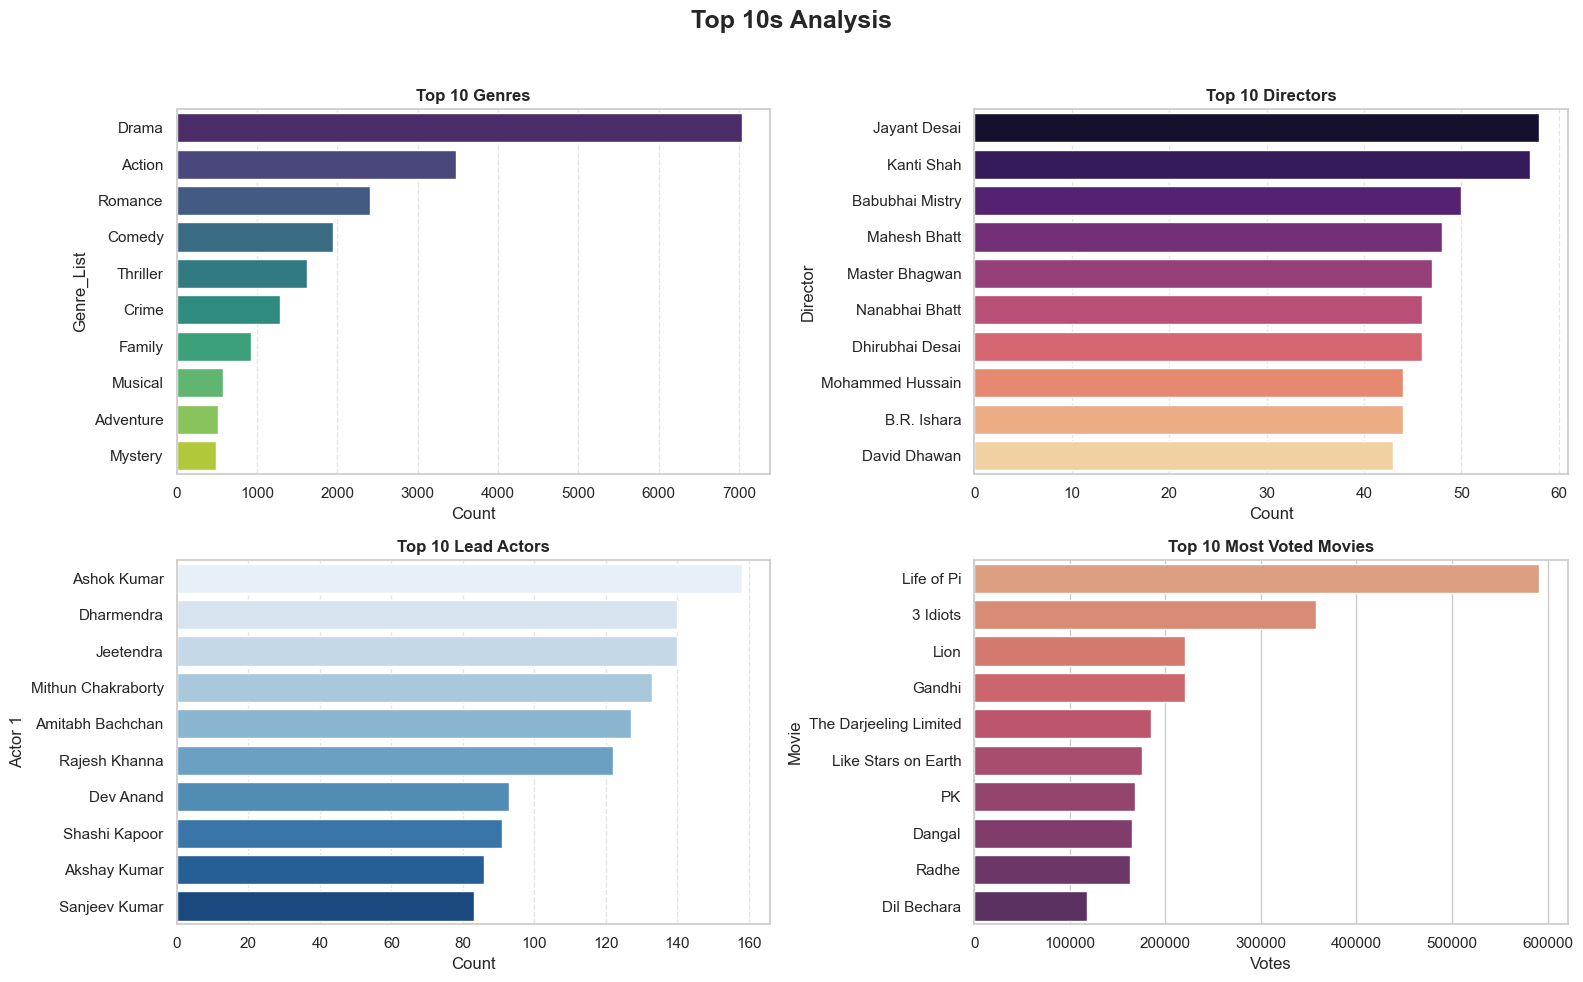

In [54]:
# Break down list values into separate comps.
df_exploded = df.explode('Genre_List')

# Setup multi-plot
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Top 10s Analysis', fontsize=18, weight='bold')

# Plot by category (genres, directors, lead actors)
plot_top_counts(df_exploded['Genre_List'], axes[0, 0], title='Top 10 Genres', palette='viridis')
plot_top_counts(df['Director'], axes[0, 1], title='Top 10 Directors', palette='magma')
plot_top_counts(df['Actor 1'], axes[1, 0], title='Top 10 Lead Actors', palette='Blues')

# Plot top voted manually (numerical values)
top_voted = df.sort_values(by='Votes', ascending=False).head(10)
sns.barplot(data=top_voted, x='Votes', y='Name', hue='Name', palette='flare', legend=False, ax=axes[1, 1])
axes[1, 1].set_title('Top 10 Most Voted Movies', fontsize=12, weight='bold')
axes[1, 1].set_xlabel('Votes')
axes[1, 1].set_ylabel('Movie')

# Display multi-plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


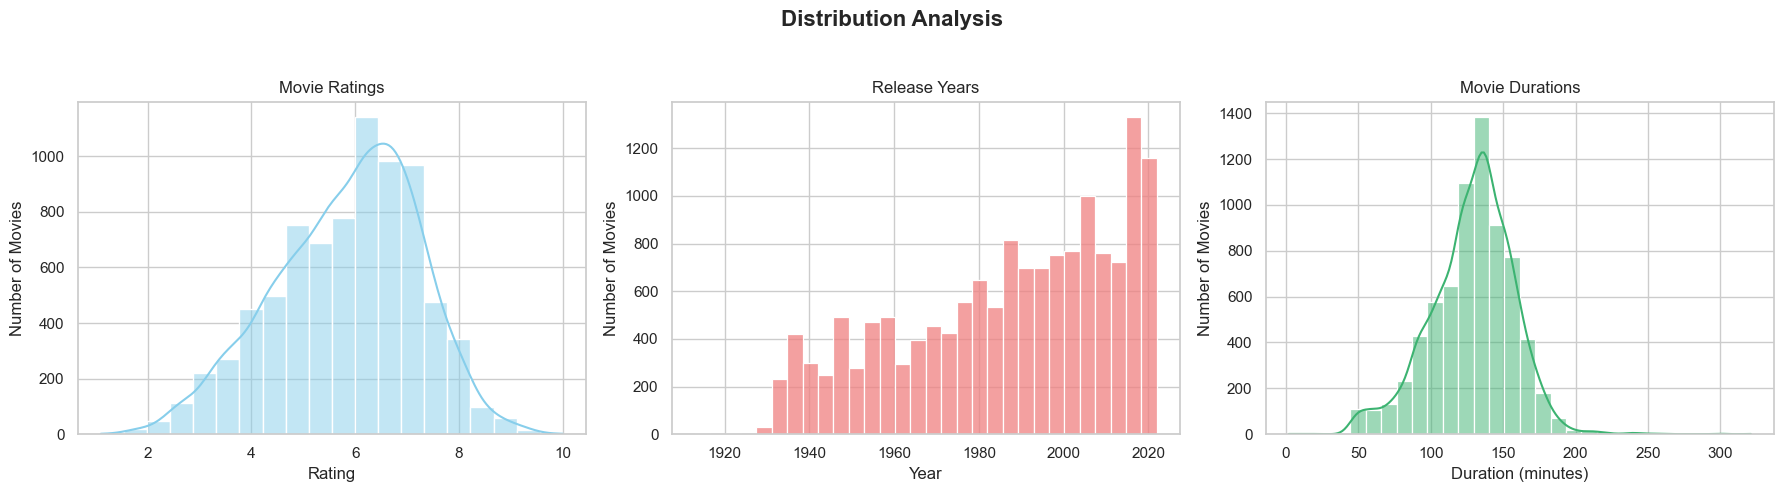

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Distribution Analysis", fontsize=16, weight='bold')

# Ratings Distribution
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title("Movie Ratings")
axes[0].set_xlabel("Rating")
axes[0].set_ylabel("Number of Movies")

# Year Distribution
sns.histplot(df['Year'], bins=30, kde=False, color='lightcoral', ax=axes[1])
axes[1].set_title("Release Years")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Number of Movies")

# Duration Distribution
sns.histplot(df['Duration'], bins=30, kde=True, color='mediumseagreen', ax=axes[2])
axes[2].set_title("Movie Durations")
axes[2].set_xlabel("Duration (minutes)")
axes[2].set_ylabel("Number of Movies")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


##### Correlation Analysis

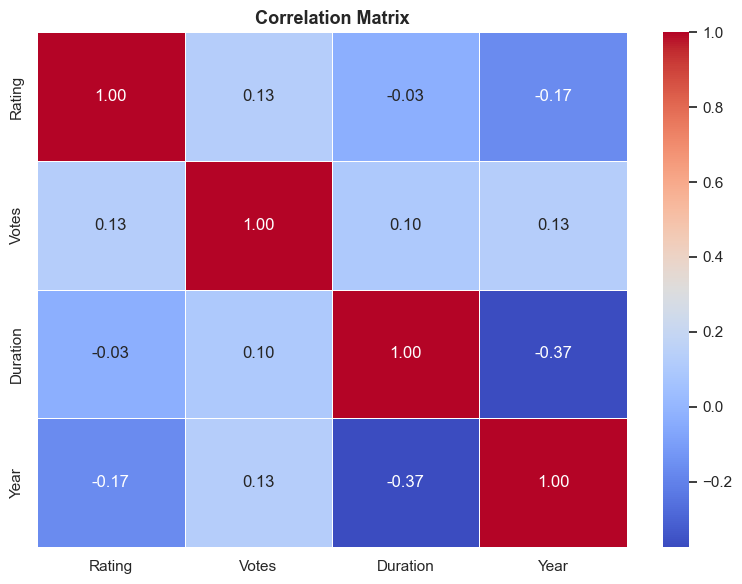

In [ ]:
# Computing correlation matrix
numeric_df = df[['Rating', 'Votes', 'Duration', 'Year']].copy()
corr_matrix = numeric_df.corr()

# Plot corr. matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=13, weight='bold')
plt.tight_layout()
plt.show()

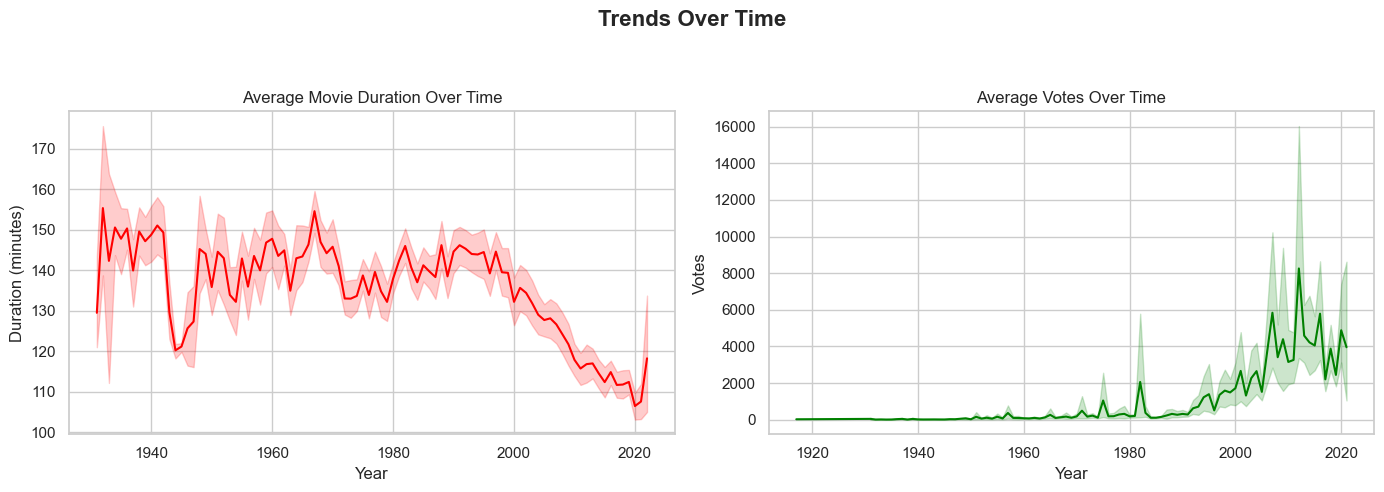

In [ ]:
# Multi-plot setup
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=False)
fig.suptitle("Trends Over Time", fontsize=16, weight='bold')

# Duration over time
sns.lineplot(data=df, x='Year', y='Duration', ax=axes[0], color='red')
axes[0].set_title("Average Movie Duration Over Time", fontsize=12)
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Duration (minutes)")
axes[0].grid(True)

# Votes over time
sns.lineplot(data=df, x='Year', y='Votes', ax=axes[1], color='green')
axes[1].set_title("Average Votes Over Time", fontsize=12)
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Votes")
axes[1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()